In [15]:
%%capture
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn;

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df_servicos = pd.read_csv("../dados/servicos_setembro_pr_curitiba.txt")
df_tecnicos = pd.read_csv("../dados/tecnicos_setor_pr_curitiba.txt", sep=";")

# Serviços

In [18]:
df_servicos.shape

(9738, 16)

# Técnicos

In [21]:
df_tecnicos.shape

(687, 4)

In [23]:
porcentagem_de_tecnicos_por_setor = df_tecnicos.groupby("setor").count()["matricula_tecnico"] / df_tecnicos.shape[0] * 100
porcentagem_de_tecnicos_por_setor.sum()

100.0

# Conclusões

In [24]:
print("Número de técnicos: " + str(df_tecnicos.shape[0]))

Número de técnicos: 687


In [25]:
print("Média de serviços que um técnico faz por mês: " + str(df_servicos.shape[0] / df_tecnicos.shape[0])[:5])

Média de serviços que um técnico faz por mês: 14.17


Curioso, a produtividade em Curitiba aparenta ser menos de metade da produtividade em Maringá.

In [27]:
df_porcentagens = df_porcentagens.reset_index()
df_porcentagens = pd.melt(df_porcentagens, id_vars=['setor'], value_vars=['tecnicos', 'servicos'], var_name='tipo', value_name='valor')

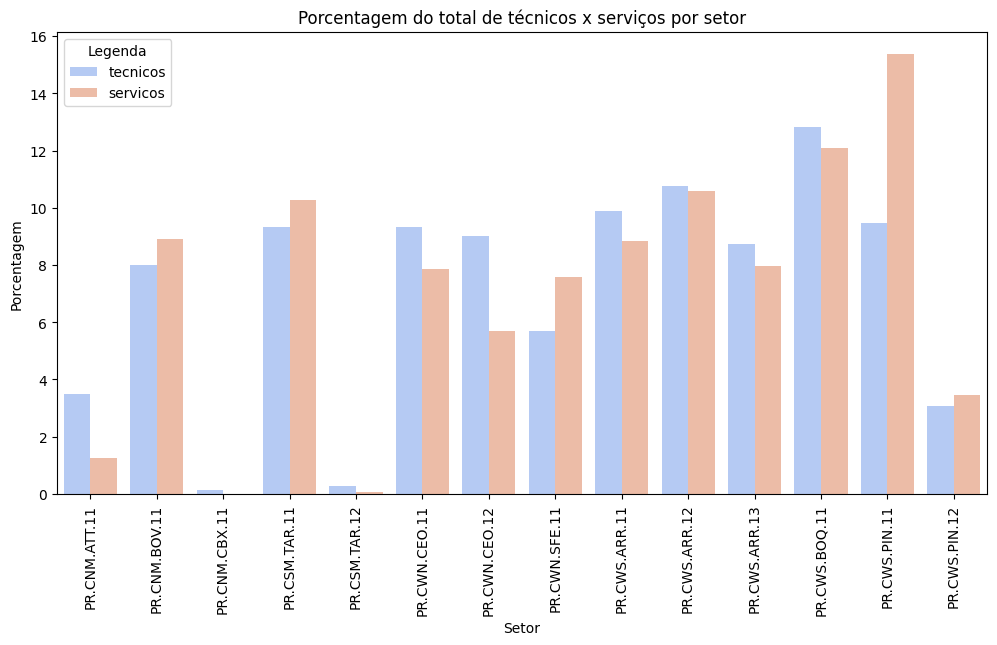

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x='setor', y='valor', hue='tipo', data=df_porcentagens, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Setor')
plt.ylabel('Porcentagem')
plt.legend(title='Legenda')
plt.title("Porcentagem do total de técnicos x serviços por setor")
plt.show()